In [1]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
a=tf.Variable(3, name="a")
b=tf.Variable(4, name="b")
f=tf.multiply(a,b)

In [99]:
f

<tf.Tensor 'Mul:0' shape=() dtype=int32>

In [100]:
init=tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result=f.eval()
    print(result)

12


In [101]:
data=load_boston()

In [102]:
X_train, X_test, y_train, y_test=train_test_split(data.data, data.target)

In [103]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [104]:
y_train.reshape(-1,1)
y_test.reshape(-1,1) #Need to reshape if your loss function isn't getting better.  Check y and|or scale it.

array([[  8.1],
       [ 23.8],
       [ 29.8],
       [ 10.8],
       [  7.2],
       [ 16.8],
       [ 12.7],
       [ 35.2],
       [ 21.2],
       [ 21.5],
       [ 24.5],
       [ 21.4],
       [ 19.2],
       [ 30.7],
       [ 19.5],
       [  8.5],
       [ 32.5],
       [ 28.1],
       [ 14.9],
       [ 36. ],
       [ 16.6],
       [ 24.8],
       [ 17.2],
       [ 14.4],
       [ 20.9],
       [ 17.8],
       [ 37.9],
       [ 46.7],
       [ 14. ],
       [  7.4],
       [ 34.6],
       [ 12.5],
       [ 13.8],
       [ 13.5],
       [ 19.1],
       [  8.4],
       [  8.3],
       [ 18.9],
       [ 13.4],
       [ 13.5],
       [ 27.5],
       [ 15.4],
       [ 19.4],
       [ 25.2],
       [ 22.8],
       [ 12.6],
       [ 22.3],
       [ 23.7],
       [ 16.2],
       [ 19.6],
       [ 23. ],
       [ 16.4],
       [ 21.1],
       [ 20.3],
       [ 21.7],
       [ 15.6],
       [ 20.6],
       [ 10.2],
       [ 48.8],
       [ 18.7],
       [ 28.4],
       [ 20.6],
       [

In [105]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

h1 = tf.layers.dense(X, 13, name='hidden1', activation=tf.nn.relu)
# h1=tf.layers.dense(X, 13, name="hidden1", activation=tf.nn.relu)#second place is how many neurons. 
y_hat = tf.layers.dense(h1, 1, activation=None)

loss = tf.losses.mean_squared_error(y, y_hat)

optimizer = tf.train.AdamOptimizer(.01)
training_op = optimizer.minimize(loss)

In [106]:
# tf.reset_default_graph()

# X=tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name="X")#Requires 3 parameters.  
# y=tf.placeholder(dtype=tf.float32, shape=(None), name="y")



In [107]:
# #Creating layers
 
# y_hat=tf.layers.dense(h1, 1, activation=None )#1st is what is being fed in.

# loss=tf.losses.mean_squared_error(y, y_hat)#actuals and predicted

# optimizer=tf.train.AdadeltaOptimizer(.01)

# training_op=optimizer.minimize(loss)

In [108]:
# init=tf.global_variables_initializer()

# with tf.Session() as sees:
#     init.run()
    
#     for epoch in range(10):
#         sess.run(training_op, feed_dict=({X:X_train, y:y_train}))

In [109]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(100):
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        train_loss=sess.run(loss, feed_dict={X:X_train, y: y_train})
        test_loss=sess.run(loss, feed_dict={X:X_test, y: y_test})
        print("epoch", epoch+1, "training loss", train_loss)
        print("epoch", epoch+1, 'test loss', test_loss)
        
    pred=sess.run(y_hat, feed_dict={X:X_test})

epoch 1 training loss 631.295
epoch 1 test loss 614.593
epoch 2 training loss 622.819
epoch 2 test loss 606.295
epoch 3 training loss 614.569
epoch 3 test loss 598.205
epoch 4 training loss 606.509
epoch 4 test loss 590.242
epoch 5 training loss 598.654
epoch 5 test loss 582.365
epoch 6 training loss 590.927
epoch 6 test loss 574.526
epoch 7 training loss 583.316
epoch 7 test loss 566.774
epoch 8 training loss 575.833
epoch 8 test loss 559.13
epoch 9 training loss 568.436
epoch 9 test loss 551.627
epoch 10 training loss 561.083
epoch 10 test loss 544.205
epoch 11 training loss 553.761
epoch 11 test loss 536.827
epoch 12 training loss 546.448
epoch 12 test loss 529.504
epoch 13 training loss 539.117
epoch 13 test loss 522.188
epoch 14 training loss 531.748
epoch 14 test loss 514.816
epoch 15 training loss 524.377
epoch 15 test loss 507.414
epoch 16 training loss 516.983
epoch 16 test loss 500.012
epoch 17 training loss 509.558
epoch 17 test loss 492.601
epoch 18 training loss 502.102
ep

In [110]:
pred

array([[ 30.31616592],
       [ 15.11377811],
       [ 21.38415909],
       [ 25.73465347],
       [ 28.09474564],
       [ 14.98321819],
       [ 14.97454071],
       [ 28.48284912],
       [ 12.397089  ],
       [ 18.90058327],
       [ 27.84835434],
       [ 13.50137329],
       [ 15.10645103],
       [ 17.31052589],
       [ 16.60069847],
       [ 24.88218117],
       [ 24.01919174],
       [ 17.2092514 ],
       [ 21.97542953],
       [ 21.46132469],
       [ 16.78026962],
       [ 25.70077324],
       [ 21.88403702],
       [ 13.44454861],
       [ 28.42051697],
       [ 23.76808167],
       [ 25.51770782],
       [ 21.99193382],
       [ 22.98134232],
       [ 27.75156593],
       [ 29.14073372],
       [ 22.87776947],
       [ 20.78155327],
       [ 12.3784914 ],
       [ 18.12335968],
       [ 27.67930794],
       [ 25.22240067],
       [ 16.27061272],
       [ 21.80038452],
       [ 22.31778336],
       [ 20.71286583],
       [ 23.67758751],
       [ 22.64309311],
       [ 22

In [111]:
#y_test.reshape(1,-1)
#pred.reshape(1,-1)

In [112]:
#sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
metrics.r2_score(y_test, pred)


-0.11654855069988246

In [113]:
pred.reshape(1,-1)
y_test.reshape(1,-1)

array([[  8.1,  23.8,  29.8,  10.8,   7.2,  16.8,  12.7,  35.2,  21.2,
         21.5,  24.5,  21.4,  19.2,  30.7,  19.5,   8.5,  32.5,  28.1,
         14.9,  36. ,  16.6,  24.8,  17.2,  14.4,  20.9,  17.8,  37.9,
         46.7,  14. ,   7.4,  34.6,  12.5,  13.8,  13.5,  19.1,   8.4,
          8.3,  18.9,  13.4,  13.5,  27.5,  15.4,  19.4,  25.2,  22.8,
         12.6,  22.3,  23.7,  16.2,  19.6,  23. ,  16.4,  21.1,  20.3,
         21.7,  15.6,  20.6,  10.2,  48.8,  18.7,  28.4,  20.6,  16.7,
         23.4,  12.8,  18.2,  18.8,  23.1,  34.9,  23.1,  48.3,  23.7,
         16.1,  16.6,   7. ,  34.9,  21.9,  33.1,  23.9,  13.9,  10.5,
         20.3,  33.3,  10.9,  17.6,  19.8,  17.5,  29.6,  12.3,  23.3,
         17.8,  34.7,  24.6,  18.5,  18.3,  45.4,  14.3,  22.5,  18.5,
         44.8,  22.9,  50. ,  25. ,  22.6,  26.4,  28.7,  16.8,  33.4,
         18.9,  29.8,  19.9,  17.4,  13.9,  14.5,  18.9,  30.5,  31.2,
         33.2,  15.6,  16.5,  23.1,  37.2,  28.2,  42.8,  21.1,  30.8,
      

In [114]:
from sklearn.metrics import r2_score
r2_score(y_test[:, 0], pred[:, 0])

IndexError: too many indices for array

# Binary Classification

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data=load_breast_cancer()

In [4]:
target=data.target * -1 +1 
target=target.reshape(-1,1)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(data.data, target)

In [6]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit(X_test)

In [6]:
tf.reset_default_graph()

X=tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y=tf.placeholder(dtype=tf.float32, shape=(None), name="y")

h1=tf.layers.dense(X,10,name="hidden1", activation=tf.nn.relu)
y_hat=tf.layers.dense(h1,1,name="y_hat",activation=tf.nn.sigmoid)

loss=tf.losses.log_loss(y,y_hat)
optimizer=tf.train.AdamOptimizer()
training_op=optimizer.minimize(loss)

In [150]:
# kf=KFold(4,shuffle=True, random_state=2003)
# batches=[]
# for train, test in kf.split(X_train,y_train):
#     batches.append(test)
# len(batches)

4

In [151]:
# init = tf.global_variables_initializer()

# with tf.Session() as sess:
#     epochs = range(1,101)
#     for epoch in epochs:
#         sess.run(training_op, feed_dict={X: X_train, y: y_train})

FailedPreconditionError: Attempting to use uninitialized value beta2_power
	 [[Node: beta2_power/read = Identity[T=DT_FLOAT, _class=["loc:@hidden1/kernel"], _device="/job:localhost/replica:0/task:0/cpu:0"](beta2_power)]]

Caused by op 'beta2_power/read', defined at:
  File "/anaconda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/anaconda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/anaconda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/anaconda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/anaconda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/anaconda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-149-3762d669162b>", line 11, in <module>
    training_op=optimizer.minimize(loss)
  File "/anaconda/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 298, in minimize
    name=name)
  File "/anaconda/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 412, in apply_gradients
    self._create_slots(var_list)
  File "/anaconda/lib/python3.6/site-packages/tensorflow/python/training/adam.py", line 116, in _create_slots
    trainable=False)
  File "/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 226, in __init__
    expected_shape=expected_shape)
  File "/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 344, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1490, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value beta2_power
	 [[Node: beta2_power/read = Identity[T=DT_FLOAT, _class=["loc:@hidden1/kernel"], _device="/job:localhost/replica:0/task:0/cpu:0"](beta2_power)]]


In [152]:
init = tf.global_variables_initializer()

# with tf.Session() as sess:
#     init.run()
#     epochs = list(range(1,101))
#     training_losses = []
#     test_losses = []
#     for epoch in epochs:
#         for batch in batches:
#             X_batch = X_train[batch]
#             y_batch = y_train[batch]
#             sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
#         training_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
#         training_losses.append(training_loss)
        
#         test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
#         test_losses.append(test_loss)
        
# plt.plot(training_losses, label='train loss')
# plt.plot(test_losses, label='test loss')
# plt.legend()

TypeError: float() argument must be a string or a number, not 'StandardScaler'

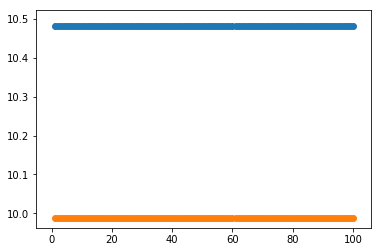

In [7]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    train_loss = []
    test_loss = []
    xs = []
    for epoch in range(100):
        xs.append(epoch+1)
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        pred = sess.run(y_hat, feed_dict={X: X_test})
        train_loss.append(sess.run(loss, feed_dict={X: X_train, y: y_train}))
        test_loss.append(sess.run(loss, feed_dict={X: X_test, y: y_test}))

plt.scatter(xs, test_loss, label='Test Loss')
plt.scatter(xs, train_loss, label='Train_Loss')

In [8]:
# tf.reset_default_graph()

# X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
# y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

# h1 = tf.layers.dense(X, 30, name='hidden1', activation=tf.nn.relu)
# h2 = tf.layers.dense(h1, 30, name='hidden2', activation=tf.nn.relu)
# h3 = tf.layers.dense(h2, 30, name='hidden3', activation=tf.nn.relu)
# y_hat = tf.layers.dense(h3, 1, name='y_hat', activation=tf.nn.sigmoid)

# loss = tf.losses.log_loss(y, y_hat)

# optimizer = tf.train.AdamOptimizer(.001)

# training_op = optimizer.minimize(loss)


# init = tf.global_variables_initializer()

# with tf.Session() as sess:
#     init.run()
#     epochs = list(range(1,100))
#     training_losses = []
#     test_losses = []
#     for epoch in epochs:
#         for batch in batches:
#             X_batch = X_train[batch]
#             y_batch = y_train[batch]
#             sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
#         training_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
#         training_losses.append(training_loss)
        
#         test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
#         test_losses.append(test_loss)
        
# plt.plot(training_losses, label='train loss')
# plt.plot(test_losses, label='test loss')
# plt.legend()

NameError: name 'batches' is not defined